## Binary Classification with Logistic Regression

This project will work with a general rice data set, indicating whether the rice is Jasmine (1) or Gonen (0).

Since this is binary classification, a logistic regression model is applicable here. The model will predict which type of rice is it, based on its physical features. 

In [11]:
# data management
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# data preprocessing
from sklearn.model_selection import train_test_split

# algorithms and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

### Data

In [2]:
rice_df = pd.read_csv('rice.csv')
rice_df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [3]:
rice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [4]:
rice_df.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [17]:
# checking the distribution of the target variable
rice_df['Class'].value_counts()

1    9985
0    8200
Name: Class, dtype: int64

### Exploratory Data Analysis

Taking a look at the correlation between features.

<AxesSubplot:>

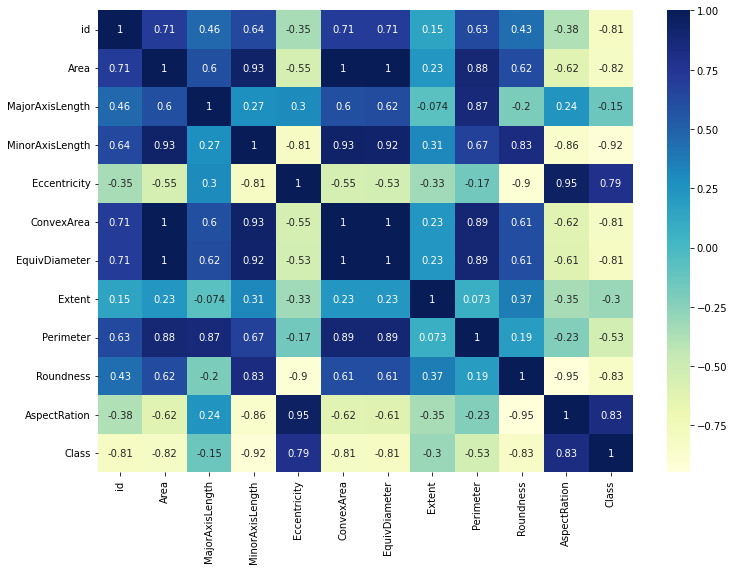

In [5]:
plt.figure(figsize=(12, 8.5))
sns.heatmap(rice_df.corr(), annot=True, cmap='YlGnBu')

In [6]:
# Dropping fully correlated features and 'id' feature
rice_df.drop(columns=['id', 'ConvexArea', 'EquivDiameter'], inplace=True)

Viewing the correlation map with the reduced dataset.

<AxesSubplot:>

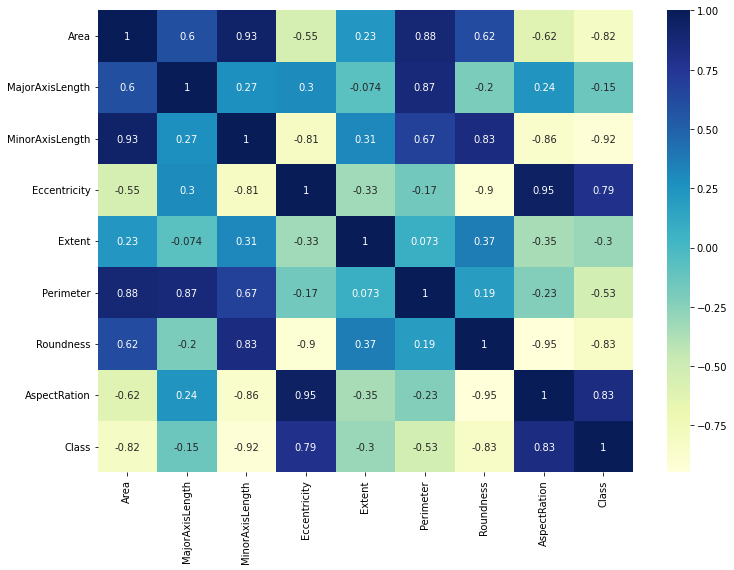

In [18]:
plt.figure(figsize=(12, 8.5))
sns.heatmap(rice_df.corr(), annot=True, cmap='YlGnBu')

### Model Construction

In [9]:
X = rice_df.drop(columns=['Class'])
y = rice_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(12729, 8) (12729,)
(5456, 8) (5456,)


In [13]:
lr_clf = LogisticRegression()

# training the model
lr_clf.fit(X_train, y_train)

LogisticRegression()

### Model Evaluation

In [14]:
y_train_pred = lr_clf.predict(X_train)
y_test_pred = lr_clf.predict(X_test)

print('Accuracy for training data: {:.4f}'.format(accuracy_score(y_train, y_train_pred)))
print('Accuracy for test data: {:.4f}'.format(accuracy_score(y_test, y_test_pred)))

Accuracy for training data: 0.9894
Accuracy for test data: 0.9864


Classification report for the test data:

In [16]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2487
           1       0.98      0.99      0.99      2969

    accuracy                           0.99      5456
   macro avg       0.99      0.99      0.99      5456
weighted avg       0.99      0.99      0.99      5456

